**כל הזכויות שמורות לי - דר׳ אלכסנדרה ליטינסקי סימנובסקי אין לעתיק ולהשתמש בחומר ללא רשות**

# **Lab #4-Linear and Logistic Regression with Python**



<img src="https://upload.wikimedia.org/wikipedia/commons/6/6e/St%C3%B6wer_Titanic.jpg" /> 

Wellcome to the Titanic, the largest British ship at the time,  that sank in the North Atlantic Ocean in the early hours of 15 April 1912.  

In this notebook we will try to undestand the characteristics of the individuals that were at the Titanic, how many survived and who survived.

This dataset is a partial dataset used as the training set on Kaggle's Titanic challenge.
 https://www.kaggle.com/c/titanic/data






#### **Columns**
 
Those the descriptions of the variables in this dataset:

<table>
    <tr><th> PassengerId </th><td> type should be integers </td></tr>
    <tr><th> Survived </th><td> Survived or Not </td></tr>
    <tr><th> Pclass </th><td> Class of Travel </td></tr>
    <tr><th> Name </th><td> Name of Passenger </td></tr>
    <tr><th> Sex </th><td> Gender </td></tr>
    <tr><th> Age </th><td> </td></tr>
    <tr><th> SibSp </th><td> Number of Sibling/Spouse abord </td></tr>
    <tr><th> Parch </th><td> Number of Parent/Child abord </td></tr>
    <tr><th> Ticket </th><td> </td></tr>
    <tr><th> Fare </th><td> </td></tr>
    <tr><th> Cabin </th><td> </td></tr>
    <tr><th> Embarked </th><td> The port in which a passenger has embarked. <br> C - Cherbourg, S - Southampton, Q = Queenstown </td></tr>
</table>


## **Import Libraries**

In [105]:
# Using http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

# Load the training and testing data
import pandas as pd


In [106]:
# Import all required libraries

# data analysis and wrangling
import numpy as np
import pandas as pd 

# data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.rcParams['figure.figsize']= (16,8)

import warnings
warnings.filterwarnings("ignore")

## The Data

Let's start by reading in the train.csv file into a pandas dataframe.

In [107]:
# Load the training  data
data_train = pd.read_csv('../train.csv') 

data_test = pd.read_csv('../test.csv')
# combin the train and test data to one df
combined_data =pd.concat([data_train, data_test])


In [108]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Exploratory Data Analysis**

Let's begin some exploratory data analysis! We'll start by checking out missing data!

## **Missing Data**

We can use seaborn to create a simple heatmap to see where we are missing data!

Text(122.0, 0.5, '')

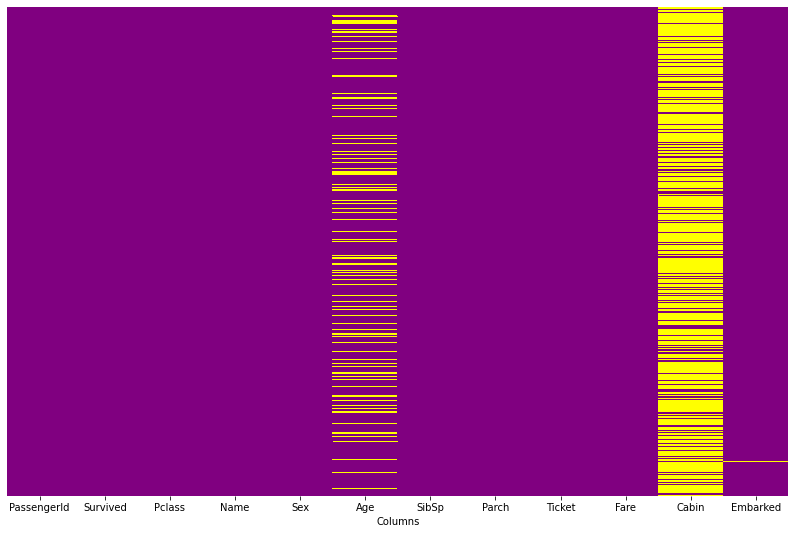

In [109]:
# plot heatmap usins seaborn  on the missing data
# plot the mising values using seaborn
missing_data_train = data_train.isnull()
plt.figure(figsize=(14,9))
sns.heatmap(missing_data_train, cbar=False, cmap=['purple', 'yellow'], yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('')


Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

Let's continue on by visualizing some more of the data! Check out the video for full explanations over these plots, this code is just to serve as reference.

<AxesSubplot:xlabel='Survived', ylabel='count'>

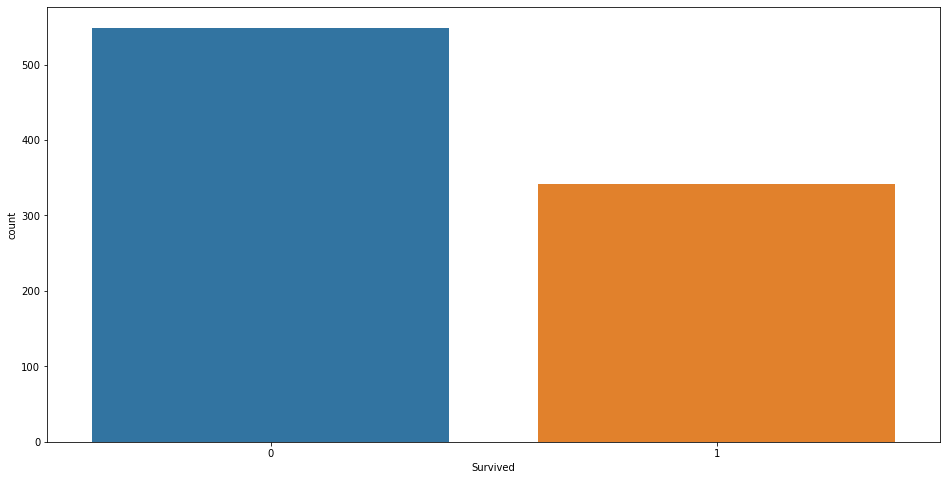

In [110]:
# plot of survived  using countplot  in seaborn package
sns.countplot(x='Survived', data=data_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

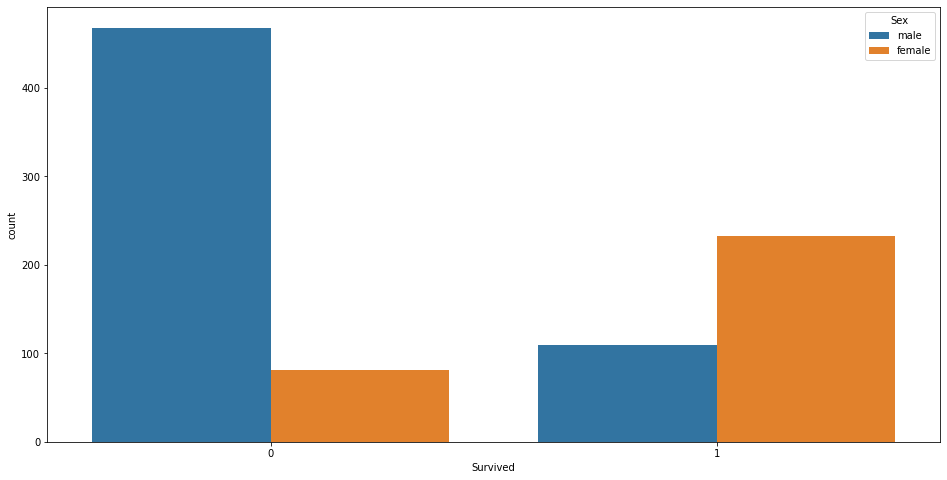

In [111]:
# plot counplot in seabon library of the survived and hue is sex
sns.countplot(x='Survived', hue='Sex', data=data_train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

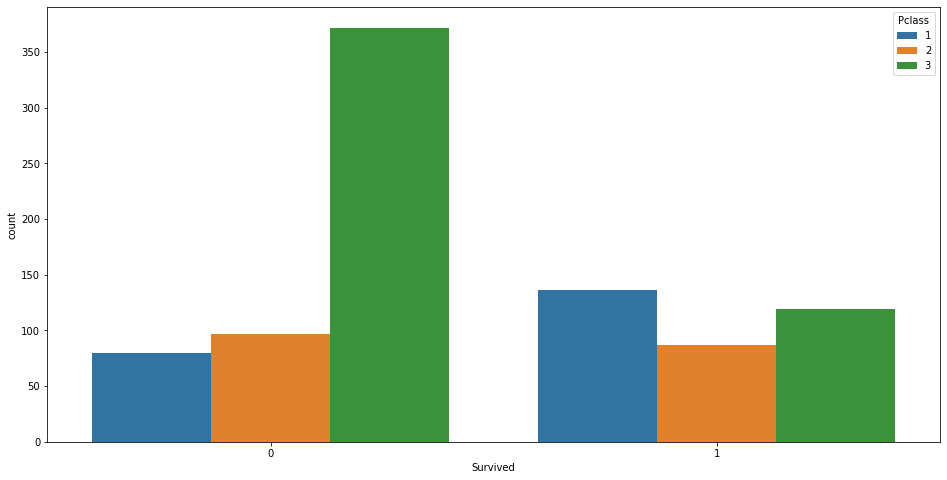

In [112]:
# plot counplot in seabon library of the survived and hue is Pclass

sns.countplot(x='Survived', hue='Pclass', data=data_train)

<AxesSubplot:xlabel='Age', ylabel='Count'>

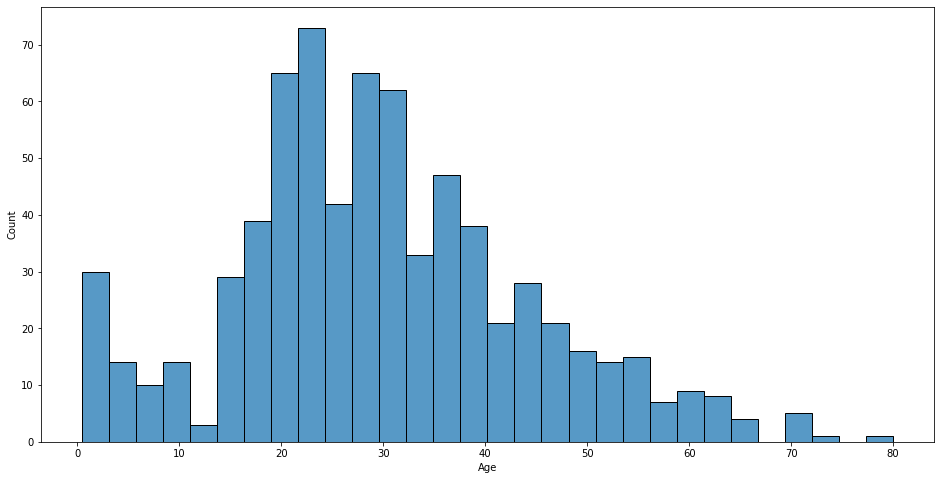

In [113]:
# plot displot with bins=30, kde=False, on train data  col age without the missing values
sns.histplot(data_train['Age'].dropna(), bins=30, kde=False)

<AxesSubplot:xlabel='Age', ylabel='Count'>

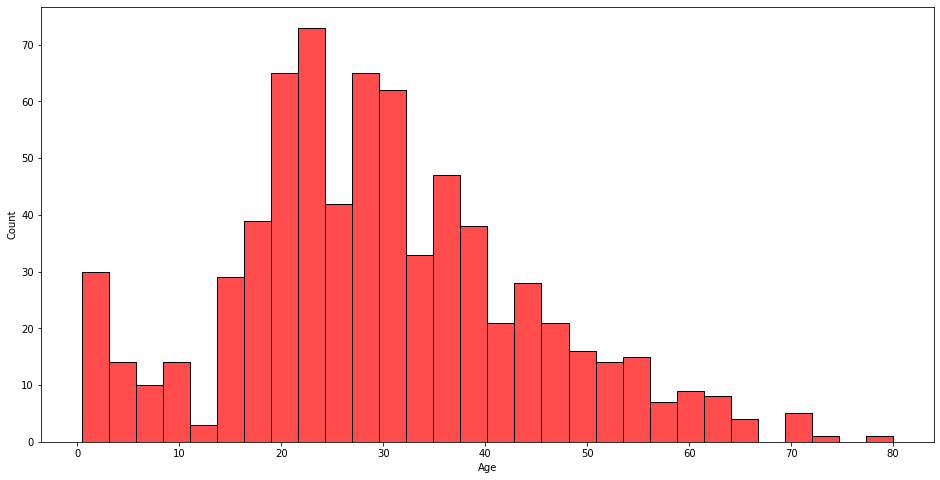

In [114]:
sns.histplot(data_train['Age'], bins=30, kde=False, alpha=0.7, color='red')

In [115]:
# make hist plot with bin=30 and alpha 0.7 on age value


___
## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. 

One way to do this is by filling in the mean age of all the passengers **(imputation)**.

However we can be smarter about this and check the average age by passenger class.


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

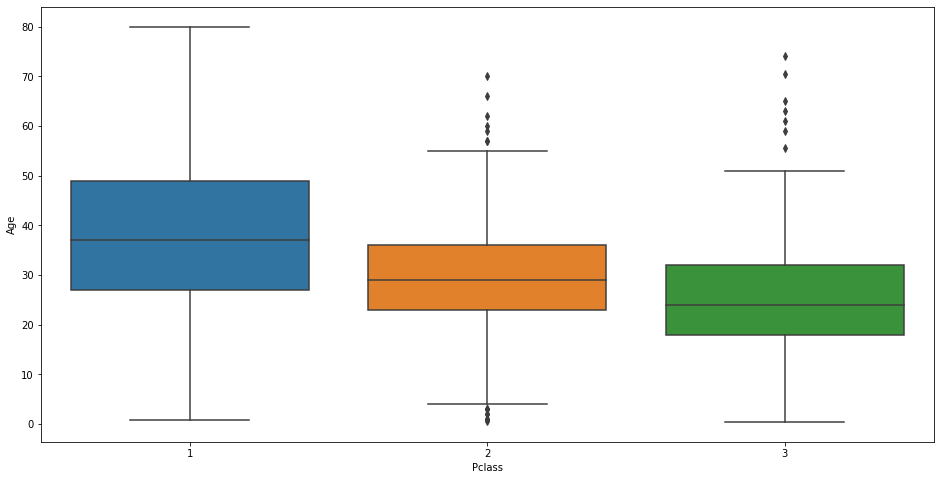

In [116]:
# make sns.boxplot to pclass and age 
sns.boxplot(x='Pclass', y='Age', data=data_train)

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use these average age values to impute based on Pclass for Age.

In [117]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

Now apply that function!

In [118]:
# make the imputation using the impute_age function
data_train['Age'] = data_train[['Age', 'Pclass']].apply(impute_age, axis=1)
# data_train.head(15)
# data_train.drop(columns=['Age_New'],inplace=True, axis=1)

Now let's check that heat map again!

Text(122.0, 0.5, '')

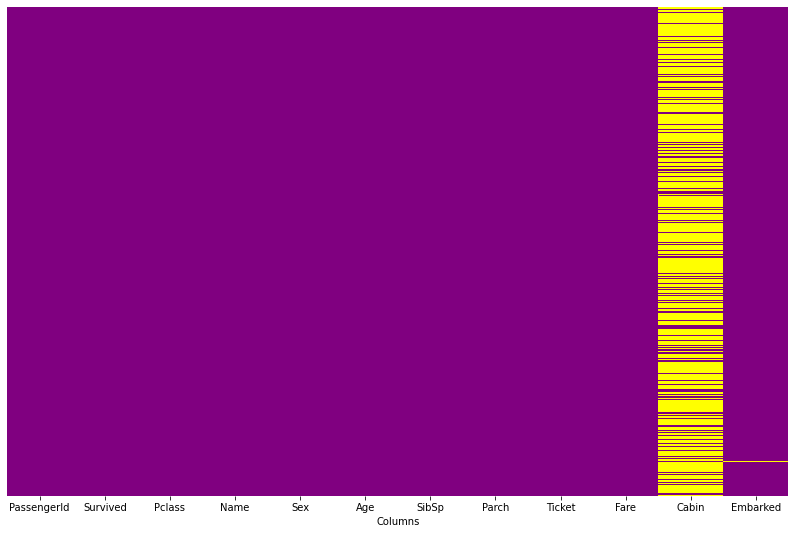

In [119]:
missing_data_train = data_train.isnull()
plt.figure(figsize=(14,9))
sns.heatmap(missing_data_train, cbar=False, cmap=['purple', 'yellow'], yticklabels=False)
plt.xlabel('Columns')
plt.ylabel('')

In [120]:
# plot heat map the data train 


Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [121]:
# remove the cabin col in one line code
data_train.drop('Cabin', axis=1, inplace=True)

In [122]:
# remove the missing rows when the  embarked is missing
data_train.dropna(inplace=True, subset=['Embarked'])

In [123]:
# check yourself
data_train['Embarked'].isnull().sum()

0

In [124]:
# fill remove mising values  - one line code


## **Converting Categorical Features**

We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [125]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [126]:
# check if you have missing values using one line 


In [127]:
sex_dummy = pd.get_dummies(data_train['Sex'], )
sex_dummy[['male']]

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [128]:
# make dummies variables  to sex - one line code 
'''
...code
'''
sex_dummy

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [129]:
embarked_dummy = pd.get_dummies(data_train['Embarked'], )
embarked_dummy[['Q', 'S']]

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [130]:
# make dummies variables  to Embarked - one line code
embarked_dummy

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [131]:
# remove colums : 'Sex','Embarked','Name','Ticket' - one line code 
data_train.drop(columns=['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True)

In [135]:
# concat sex and embark dummies var to the data_train
# data_train['Sex'] = sex_dummy['male']
# data_train['Embarked'] = embarked_dummy['']
data_train = pd.concat([data_train, embarked_dummy, sex_dummy
           ], axis=1,)

In [136]:
data_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
0,1,0,3,22.0,1,0,7.2500,0,0,1,0,1
1,2,1,1,38.0,1,0,71.2833,1,0,0,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
3,4,1,1,35.0,1,0,53.1000,0,0,1,1,0
4,5,0,3,35.0,0,0,8.0500,0,0,1,0,1


In [134]:
data_train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


<AxesSubplot:>

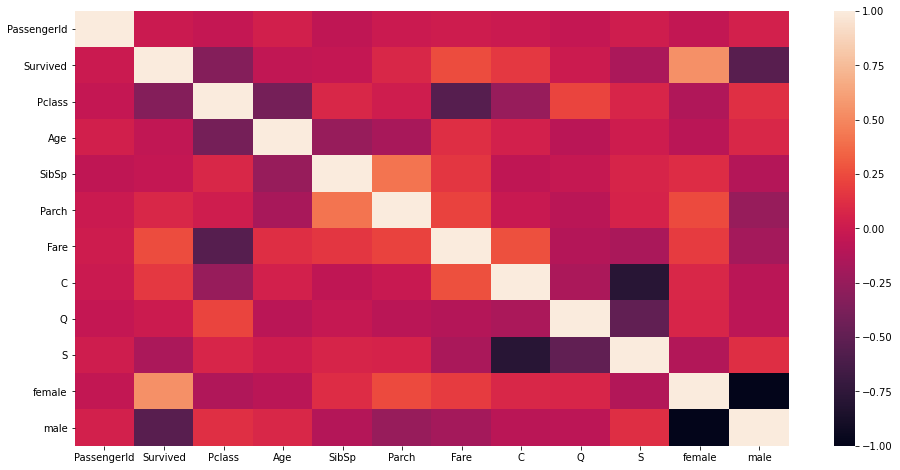

In [141]:

sns.heatmap(data_train.corr(), annot=False )


<AxesSubplot:>

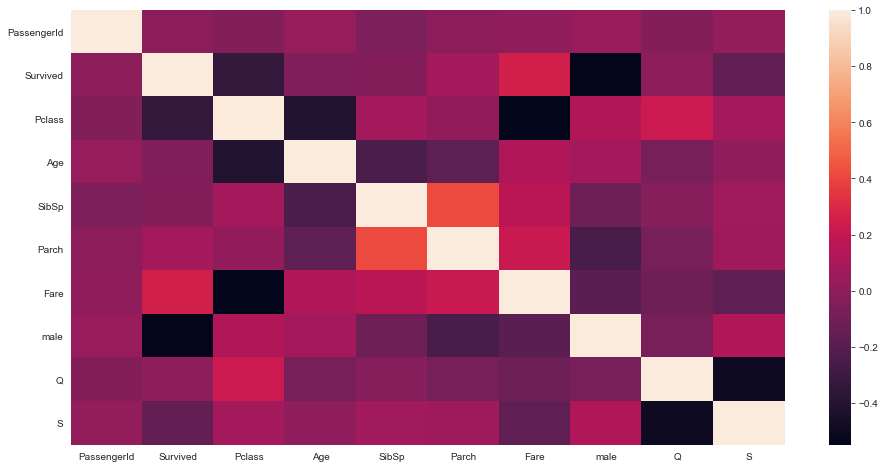

In [60]:
# check the correlation between all features PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
# 'male', 'Q', 'S'
# data_train.corr()



# **Models**


Let's start by splitting our data into a training set and test set (there is another test.csv file that you can play around with in case you want to use all this data for training).

## **Train Test Split**

In [145]:
# import train_test_split
from sklearn.model_selection import train_test_split

# split the data to X_train, X_test, y_train, y_test
v = train_test_split(data_train, test_size=0.3, random_state=101,  )

In [149]:
v[0]

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,C,Q,S,female,male
807,808,0,3,18.0,0,0,7.7750,0,0,1,1,0
651,652,1,2,18.0,0,1,23.0000,0,0,1,1,0
2,3,1,3,26.0,0,0,7.9250,0,0,1,1,0
690,691,1,1,31.0,1,0,57.0000,0,0,1,0,1
196,197,0,3,24.0,0,0,7.7500,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
576,577,1,2,34.0,0,0,13.0000,0,0,1,1,0
840,841,0,3,20.0,0,0,7.9250,0,0,1,0,1
338,339,1,3,45.0,0,0,8.0500,0,0,1,0,1
524,525,0,3,24.0,0,0,7.2292,1,0,0,0,1


Let's now begin to train out regression model! 

We will need to first split up our data into an X_train  that contains the features to train on, and a y_train  with the target variable, in this case the Survived column. 

We removed the name colum and anather text info that the linear regression model can't use.


In [43]:
# split the train data to train and test(eval) test_size=30% of the train data  
# lable is the Age column


# **Building a Linear  Regression model**
## **Training and Predicting**

In [152]:
# import LinearRegression
from sklearn.model_selection import train_test_split

# split the data to X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Age']), data_train['Age'], test_size=0.3, random_state=101, )

In [153]:
# define the model
import sklearn.linear_model as lm
lg = lm.LinearRegression()

# fit the model


#lm=....

LinearRegression()

In [154]:
# fit the lm
lg.fit(X_train, y_train)


LinearRegression()

In [155]:
pred = lg.predict( X_test )



<AxesSubplot:xlabel='Age'>

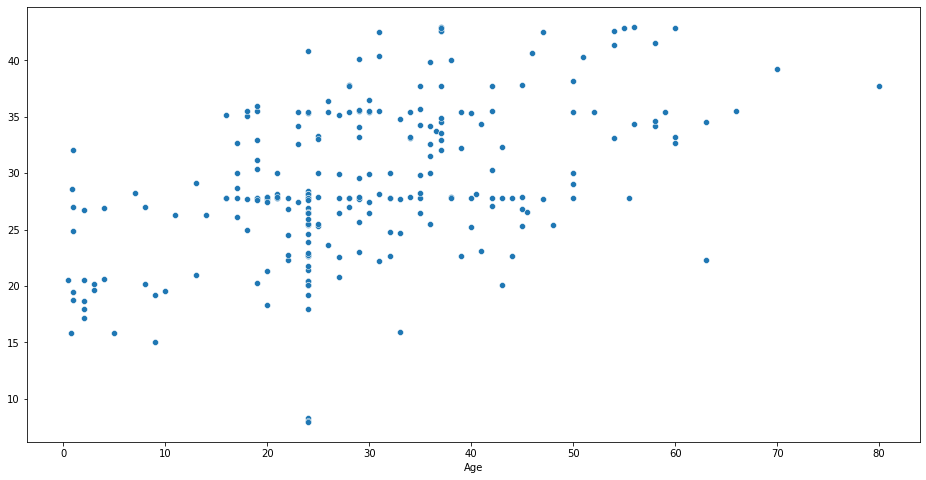

In [157]:
sns.scatterplot(y_test, pred)

In [158]:
# get the R squared value
lg.score(X_test, y_test)

0.25394146461385003

## **Model Evaluation**

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [160]:
# what the intercept 
# print the intercept
print(f'the intercept is: {lg.intercept_}')

the intercept is: 50.697712064196764


In [162]:
coeff_df  = pd.DataFrame(lg.coef_, X_train.columns, columns=['Coefficient'])
coeff_df

,Coefficient
PassengerId,-0.000143
Survived,-5.151299
Pclass,-7.726856
SibSp,-2.117401
Parch,-0.757500
Fare,-0.016777
C,-0.996436
Q,0.682839
S,0.313597
female,-0.163599


In [48]:
# get df with index of the features and colum of coefficient value and explain the meaning 



,Coefficient
PassengerId,-0.000143
Survived,-5.151299
Pclass,-7.726856
SibSp,-2.117401
Parch,-0.757500
Fare,-0.016777
male,0.327197
Q,1.679275
S,1.310033


**Interpreting the coefficients:**

### What is it ? 

The coefficient of a feature in a linear regression model represents the change in the mean of the target variable for one unit of change in the feature while holding other features constant.

for example ```age = -5.5 * survived + .... ```


## **Predictions from our Model**

Let's grab predictions off our test set and see how well it did!

In [163]:
# calculate the predict 
pred = lg.predict( X_test )


<AxesSubplot:xlabel='Age'>

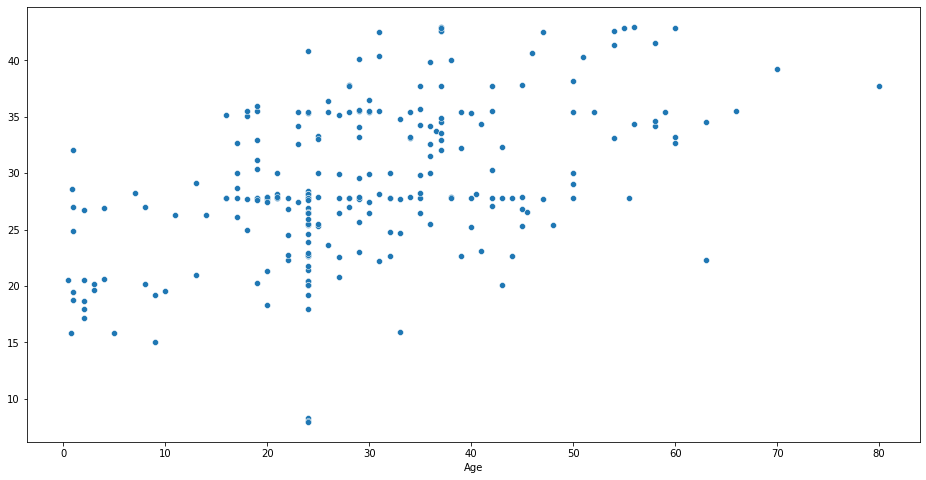

In [164]:
# plot y_test vs predictions  
sns.scatterplot(y_test, pred)

## **Residual Histogram**

<AxesSubplot:xlabel='Age', ylabel='Count'>

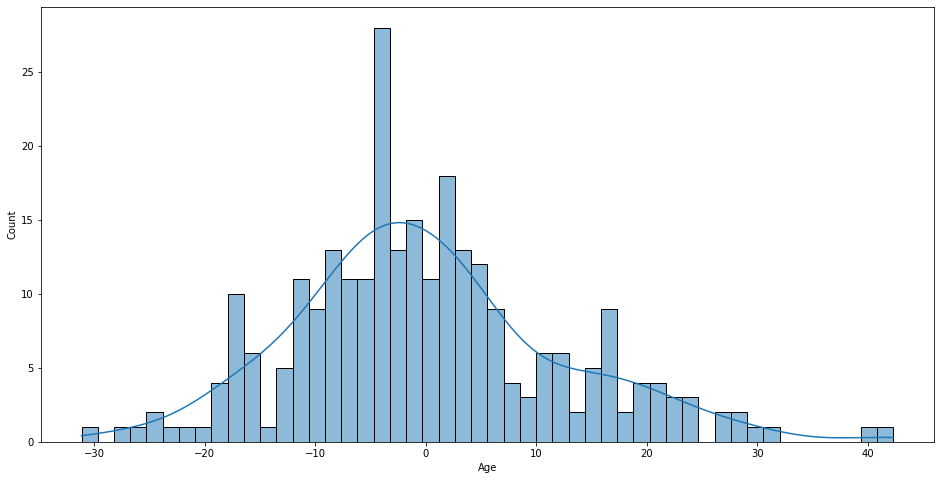

In [166]:
sns.histplot((y_test - pred), bins=50, kde=True)

<AxesSubplot:xlabel='Age', ylabel='Density'>

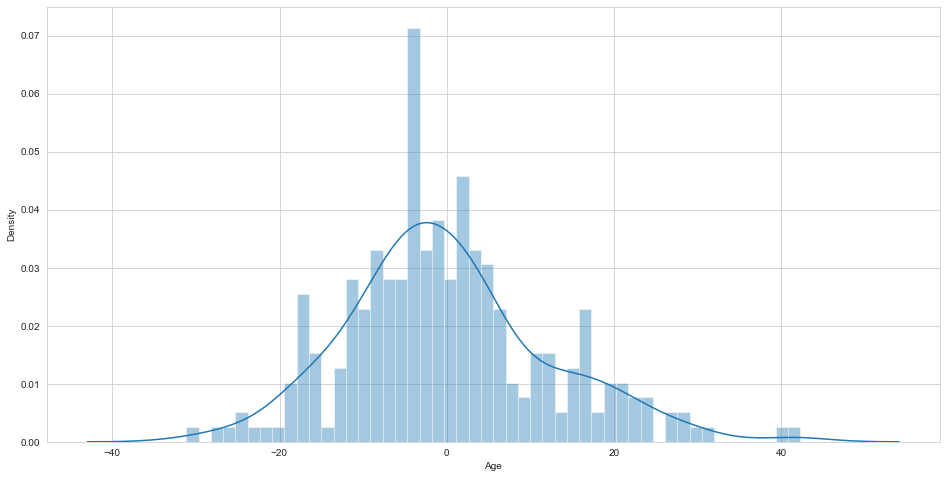

In [52]:
# plot residual histogram using displot with bins=50


## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [172]:
# load evaluation mean_squared_error, r2_score, confusion_matrix, roc_curve, roc_auc_score,mean_absolute_error
import sklearn
MSE = sklearn.metrics.mean_squared_error(y_test, pred)
MAE = sklearn.metrics.mean_absolute_error(y_test, pred)
RMSE = sklearn.metrics.mean_squared_error(y_test, pred, squared=False)
R2 = sklearn.metrics.r2_score(y_test, pred)

In [174]:
# print the MAE , the MSE, the RMSE and the R^2 each evaluation metrics in one row 

print(f'MAE: {MAE} \nMSE: {MSE}, \nRMSE: {np.sqrt(MSE)}, \nR^2: {R2} \nRMSE: {RMSE}')

MAE: 9.209496590481912 
MSE: 144.6693192349607, 
RMSE: 12.027855969995679, 
R^2: 0.25394146461385003 
RMSE: 12.027855969995679


# **Building a Logistic Regression model**
## **Training and Predicting**

In [175]:
# import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [185]:
# We are ready to train and evaluate a classifier.
# First, let's split the data into train and test and train fit a Logistic classifier
X_train, X_test, y_train, y_test = train_test_split(data_train.drop(columns=['Survived']), data_train['Survived'], test_size=0.3, random_state=101, )


# split the train data to train and test(eval) test_size=30% of the train data  
# lable is the Survived column






In [186]:
# difine the logisitcregresion model 

'''
code 
'''

lr = LogisticRegression()


In [187]:
# fit the model
lr.fit(X_train, y_train)

LogisticRegression()

In [188]:
predictions = lr.predict(X_test)

predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1])

In [75]:
# Now let's predict

'''
code

'''
predictions

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0])

Let's move on to evaluate our model!

## Evaluation

We can check precision,recall,f1-score using classification report!

In [191]:
# import classification_report
import sklearn.metrics as metrics
report = metrics.classification_report(y_test, predictions)
cm_log = metrics.confusion_matrix(y_test, predictions)

# report

# report.

# #  calculate the y_hat_test 
# y_hat_test = lr.predict(X_test)

# #  get the confution matrix
# cm_log= lr.
cm_log

array([[149,  14],
       [ 35,  69]])

In [81]:
# Calculating confusion matrix for the test set
#  calculate the y_hat_test 
y_hat_test = lr.predict(X_test)
#  get the confution matrix
# cm_log= lr.coef_
cm_log

array([[140,  26],
       [ 24,  77]])

<AxesSubplot:>

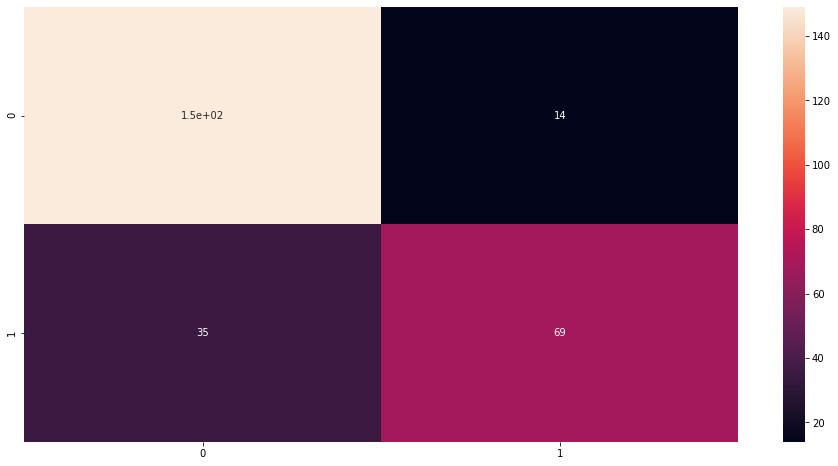

In [192]:
# plot the confution matrix usign sns.heatmap add the title,xlable, ylable
sns.heatmap(cm_log, annot=True)


**Explain the confution matrix**

In [193]:
print(report)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.66      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [79]:
#  print classification_report
report

              precision    recall  f1-score   support

           0       0.85      0.84      0.85       166
           1       0.75      0.76      0.75       101

    accuracy                           0.81       267
   macro avg       0.80      0.80      0.80       267
weighted avg       0.81      0.81      0.81       267



0.8633199622463426

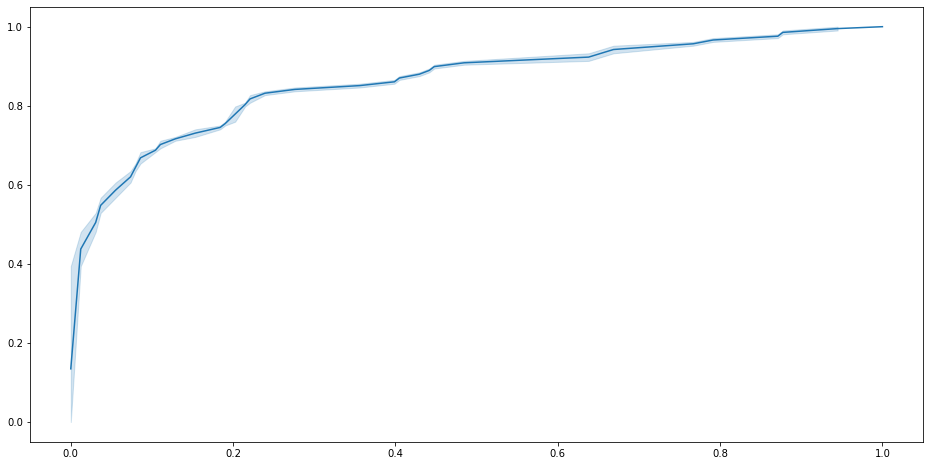

In [200]:
lr.predict_proba(X_test)



roc = metrics.roc_curve(y_test, lr.predict_proba(X_test)[:,1])

roc_curve_plot  = sns.lineplot(roc[0], roc[1])

AUC = metrics.roc_auc_score(y_test, lr.predict_proba(X_test)[:,1])

AUC

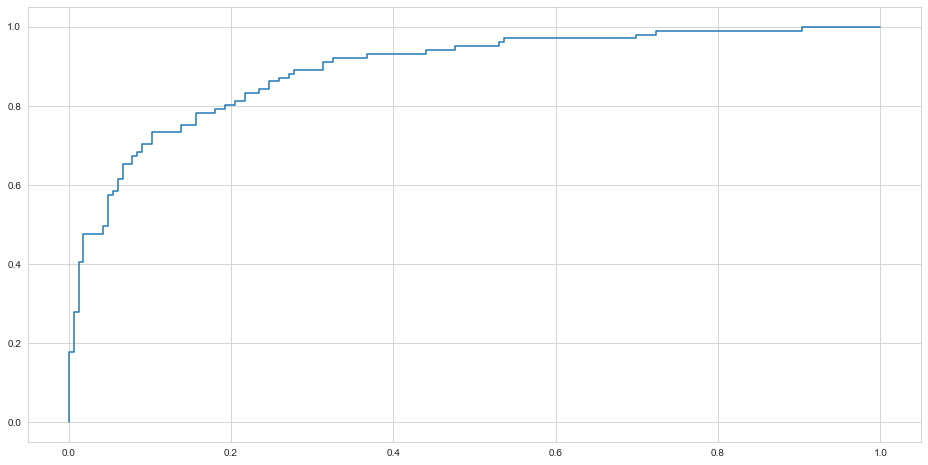

AUC= 0.8028748657998331


In [80]:
# Plotting ROC curve
# Using http://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html
# using the predict_proba and roc_curve


**Explain the AUC value**

---------------
the auc is the area under the curve, this mean the area under the curve of the ROC curve. The ROC curve is a graphical representation of the true positive rate against the false positive rate for the different possible cut points of a diagnostic test. The AUC is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.

---------------

This was your first real Machine Learning Project! Congrats on helping your neighbor out! We'll let this end here for now, but go ahead and explore the Boston Dataset mentioned earlier if this particular data set was interesting to you! 

Up next is your own Machine Learning Project!



Not so bad! You might want to explore other feature engineering and the other titanic_text.csv file, some suggestions for feature engineering:

* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* Maybe the Cabin letter could be a feature
* Is there any info you can get from the ticket?

# **Great Job!** :)